In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns


In [32]:
df=pd.read_csv(r"C:\Users\Richa\Desktop\fake-news\train.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [33]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [34]:
df.shape

(20800, 5)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


<AxesSubplot:>

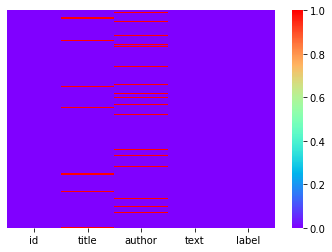

In [36]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="rainbow")

In [37]:
df=df.dropna()

<AxesSubplot:>

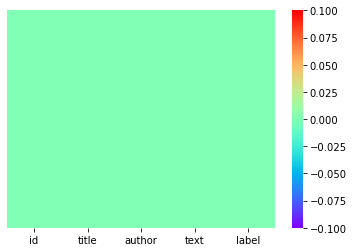

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="rainbow")

In [39]:
X=df.drop("label",axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [40]:
Y=df.iloc[:,-1:]
Y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [41]:
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense

In [42]:
voc_size=5000

In [43]:
msg=X.copy()


In [44]:
msg.reset_index(inplace=True)

In [45]:
msg.head(10)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [46]:
import re
from nltk.corpus import stopwords

# Data Preprocessing

In [47]:
from nltk.stem.porter import PorterStemmer

In [48]:
ps=PorterStemmer()

In [49]:
corpus=[]
for i in range(0,len(msg)):
    x=re.sub("[^a-zA-Z]"," ",msg["title"][i])
    x=x.lower()
    x=x.split()
    x=[ps.stem(word) for word in x if not word in stopwords.words("english")]
    x=" ".join(x)
    corpus.append(x)

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [52]:
encoding=[one_hot(words,voc_size) for words in corpus]
encoding

[[966, 2682, 1283, 1852, 1163, 4390, 2329, 4636, 4373, 163],
 [3411, 2192, 4725, 3310, 2102, 2514, 2323],
 [678, 4469, 2382, 2995],
 [2461, 1839, 1543, 1203, 2438, 156],
 [1728, 2102, 4802, 1847, 3587, 2162, 2102, 939, 3062, 4779],
 [3858,
  211,
  1049,
  2597,
  645,
  3215,
  3609,
  4992,
  76,
  3715,
  1794,
  3034,
  2505,
  58,
  2323],
 [2387, 2964, 4257, 551, 2371, 3265, 1715, 2858, 2690, 4316, 622],
 [1577, 3313, 778, 2400, 3190, 1000, 3215, 2746, 2690, 4316, 622],
 [4703, 2406, 3465, 4451, 1470, 2774, 1901, 2830, 3215, 3274],
 [497, 3598, 4855, 168, 1746, 4951, 2120, 3260],
 [4348, 226, 2363, 492, 2032, 1943, 2863, 3193, 600, 3503, 535],
 [1203, 1233, 1163, 2774, 3215, 3190],
 [4627, 1078, 26, 3908, 4193, 4454, 1518, 3378, 2995],
 [4993, 707, 3673, 574, 596, 4335, 1141, 2690, 4316, 622],
 [2372, 967, 2943, 1380, 3822, 2690, 4316, 622],
 [3189, 2239, 1958, 2959, 2704, 535, 3794, 4853, 4954, 2384],
 [1999, 4372, 2192],
 [1066, 4190, 2029, 1929, 3215, 4832, 920, 2323],
 [4220,

In [53]:
lenght=20
emb=pad_sequences(encoding,padding="pre",maxlen=lenght)
print(emb)

[[   0    0    0 ... 4636 4373  163]
 [   0    0    0 ... 2102 2514 2323]
 [   0    0    0 ... 4469 2382 2995]
 ...
 [   0    0    0 ... 2690 4316  622]
 [   0    0    0 ... 3946 2946 4773]
 [   0    0    0 ...   43 4166 2976]]


In [54]:
emb[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 3411, 2192, 4725, 3310, 2102, 2514, 2323])

In [56]:
emb_feature=40
model=Sequential()
model.add(Embedding(voc_size,emb_feature,input_length=lenght))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [61]:
X_result=np.array(emb)
Y_result=np.array(Y)
print(X_result.shape,Y_result.shape)

(18285, 20) (18285, 1)


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X_result,Y_result,test_size=0.33,random_state=42)

# Train

In [64]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=125,batch_size=32)

Epoch 1/125
383/383 [==============================] - 18s 26ms/step - loss: 0.2765 - accuracy: 0.8741 - val_loss: 0.1987 - val_accuracy: 0.9193
Epoch 2/125
383/383 [==============================] - 10s 25ms/step - loss: 0.1381 - accuracy: 0.9457 - val_loss: 0.2003 - val_accuracy: 0.9183
Epoch 3/125
383/383 [==============================] - 9s 22ms/step - loss: 0.0949 - accuracy: 0.9647 - val_loss: 0.2314 - val_accuracy: 0.9173
Epoch 4/125
383/383 [==============================] - 8s 21ms/step - loss: 0.0662 - accuracy: 0.9752 - val_loss: 0.2747 - val_accuracy: 0.9170
Epoch 5/125
383/383 [==============================] - 9s 22ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.2930 - val_accuracy: 0.9120
Epoch 6/125
383/383 [==============================] - 8s 21ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.3927 - val_accuracy: 0.9142
Epoch 7/125
383/383 [==============================] - 8s 22ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.4624 - val_accurac

In [65]:
from keras.layers import Dropout

In [66]:
emb_feature=40
model=Sequential()
model.add(Embedding(voc_size,emb_feature,input_length=lenght))
model.add(LSTM(100))
model.add(Dropout(0.30))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
X_result=np.array(emb)
Y_result=np.array(Y)
print(X_result.shape,Y_result.shape)

(18285, 20) (18285, 1)


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X_result,Y_result,test_size=0.33,random_state=42)

In [70]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=125,batch_size=32)

Epoch 1/125
383/383 [==============================] - 16s 34ms/step - loss: 0.2809 - accuracy: 0.8706 - val_loss: 0.1993 - val_accuracy: 0.9198
Epoch 2/125
383/383 [==============================] - 10s 25ms/step - loss: 0.1406 - accuracy: 0.9456 - val_loss: 0.2234 - val_accuracy: 0.9188
Epoch 3/125
383/383 [==============================] - 9s 23ms/step - loss: 0.1005 - accuracy: 0.9623 - val_loss: 0.2164 - val_accuracy: 0.9162
Epoch 4/125
383/383 [==============================] - 8s 22ms/step - loss: 0.0676 - accuracy: 0.9758 - val_loss: 0.2528 - val_accuracy: 0.9181
Epoch 5/125
383/383 [==============================] - 8s 22ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.3059 - val_accuracy: 0.9074
Epoch 6/125
383/383 [==============================] - 8s 22ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.4282 - val_accuracy: 0.9029
Epoch 7/125
383/383 [==============================] - 8s 22ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.4511 - val_accurac